<a href="https://colab.research.google.com/github/head1ton/Analysis_System/blob/main/theme_classifier/theme_classification_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Huggingface

In [4]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else 'cpu'

In [5]:
def load_model(device):
    theme_classifier = pipeline(
        "zero-shot-classification",
        model=model_name,
        device=device
    )
    return theme_classifier

In [6]:
theme_classifier = load_model(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [7]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [8]:
theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121253490447998,
  0.47500181198120117,
  0.08781816065311432,
  0.04500045254826546,
  0.020132921636104584,
  0.012040478177368641,
  0.0042923795990645885,
  0.002817221451550722]}

In [9]:
!mkdir data
!unzip -q 'Subtitles.zip' -d 'data/'

In [15]:
files = sorted(glob('data/Subtitles/*.ass'))

In [16]:
files[:5]

['data/Subtitles/Naruto Season 1 - 01.ass',
 'data/Subtitles/Naruto Season 1 - 02.ass',
 'data/Subtitles/Naruto Season 1 - 03.ass',
 'data/Subtitles/Naruto Season 1 - 04.ass',
 'data/Subtitles/Naruto Season 1 - 05.ass']

In [17]:
with open(files[0], 'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines = [",".join(line.split(',')[9:]) for line in lines]

In [18]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n']

In [19]:
" ".join(lines[:10])

"A long time ago, a powerful demon fox\\Nappeared with nine tails.\n With its powerful tails,\n it could smash mountains\\Nand create tidal waves.\n A band of Ninjas rose to\\Ndefend their village from attack.\n We have to wait until\\Nthe Fourth Hokage gets here!\n We can't let it get any closer\\Nto our village!\n One great Ninja was able to\\Nimprison the monster,\n but died in the process.\n This Ninja was known as…\\Nthe Fourth Hokage.\n Naruto!\n"

In [20]:
files[0]

'data/Subtitles/Naruto Season 1 - 01.ass'

In [21]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [25]:
def load_subtitles_dataset(dataset_path):
    subtitles_paths = sorted(glob(dataset_path + '/*.ass'))

    scripts = []
    episode_num = []

    for path in subtitles_paths:
        with open(path, 'r') as file:
            lines = file.readlines()
            lines = lines[27:]
            lines = [",".join(line.split(',')[9:]) for line in lines]

        lines = [line.replace('\\N', ' ') for line in lines]
        script = " ".join(lines)

        episode = int(path.split('-')[-1].split('.')[0].strip())

        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({"episode": episode_num, "script": scripts})
    return df

In [26]:
dataset_path = "data/Subtitles"
df = load_subtitles_dataset(dataset_path)

In [27]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


In [28]:
script = df.iloc[0]['script']

In [29]:
script

'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [32]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.']

In [34]:
len(script_sentences)

299

In [35]:
# Batch Sentence
sentence_batch_size = 20
script_batches = []

for index in range(0, len(script_sentences), sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [36]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed t

In [37]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [38]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9800741076469421,
   0.9396902322769165,
   0.8546882271766663,
   0.7349811792373657,
   0.7284972667694092,
   0.199098229408264

In [39]:
# Wrangle Output
themes = {}
for output in theme_output:
    for label, score in zip(output['labels'], output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [41]:
themes

{'dialogue': [0.9800741076469421, 0.9370124936103821],
 'betrayal': [0.9396902322769165, 0.6457270383834839],
 'battle': [0.8546882271766663, 0.6581321358680725],
 'sacrifice': [0.7349811792373657, 0.6258841753005981],
 'self development': [0.7284972667694092, 0.8678211569786072],
 'hope': [0.19909822940826416, 0.20423969626426697],
 'friendship': [0.05922307074069977, 0.08603358268737793],
 'love': [0.04026186093688011, 0.028020652011036873]}

In [42]:
themes = {key: np.mean(np.array(value)) for key, value in themes.items()}

In [43]:
themes

{'dialogue': np.float64(0.9585433006286621),
 'betrayal': np.float64(0.7927086353302002),
 'battle': np.float64(0.7564101815223694),
 'sacrifice': np.float64(0.6804326772689819),
 'self development': np.float64(0.7981592118740082),
 'hope': np.float64(0.20166896283626556),
 'friendship': np.float64(0.07262832671403885),
 'love': np.float64(0.03414125647395849)}

In [44]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size = 20
    script_batches = []
    for index in range(0, len(script_sentences), sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)

    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    themes = {}
    for output in theme_output:
        for label, score in zip(output['labels'], output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key, value in themes.items()}

    return themes

In [45]:
df = df.head(2)

In [46]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."


In [47]:
output_themes = df['script'].apply(get_themes_inference)

In [62]:
# prompt: 출력 리스트를 넓게 볼 수 있게 하려면?

import pandas as pd
pd.set_option("display.max_colwidth", 300)
pd.set_option("display.max_columns", 20)


In [63]:
output_themes

,script
0,"{'dialogue': 0.9585433006286621, 'betrayal': 0.7927086353302002, 'battle': 0.7564101815223694, 'sacrifice': 0.6804326772689819, 'self development': 0.7981592118740082, 'hope': 0.20166896283626556, 'friendship': 0.07262832671403885, 'love': 0.03414125647395849}"
1,"{'dialogue': 0.9606060683727264, 'sacrifice': 0.5707037150859833, 'self development': 0.48281005024909973, 'battle': 0.6848458498716354, 'love': 0.1732612180057913, 'hope': 0.15453363489359617, 'friendship': 0.04626081511378288, 'betrayal': 0.42994377948343754}"


In [51]:
theme_df = pd.DataFrame(output_themes.tolist())

In [52]:
theme_df

,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,0.958543,0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,0.960606,0.429944,0.684846,0.570704,0.482810,0.154534,0.046261,0.173261


In [64]:
df

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our ...",0.958543,0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chased by something\n Inside my heart is pounding\n My throat dry like it's withering\n For no single one,\n To none does belong,\n This time is ours, right now...\n Unraveling the pain,\n Unraveling our hearts,\n Unraveling shadows\n Stifling our breath...",0.960606,0.429944,0.684846,0.570704,0.482810,0.154534,0.046261,0.173261


In [65]:
df[theme_df.columns] = theme_df
df

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our ...",0.958543,0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chased by something\n Inside my heart is pounding\n My throat dry like it's withering\n For no single one,\n To none does belong,\n This time is ours, right now...\n Unraveling the pain,\n Unraveling our hearts,\n Unraveling shadows\n Stifling our breath...",0.960606,0.429944,0.684846,0.570704,0.482810,0.154534,0.046261,0.173261


In [66]:
df = df.drop('dialogue', axis=1)

In [67]:
df

,episode,script,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our ...",0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chased by something\n Inside my heart is pounding\n My throat dry like it's withering\n For no single one,\n To none does belong,\n This time is ours, right now...\n Unraveling the pain,\n Unraveling our hearts,\n Unraveling shadows\n Stifling our breath...",0.429944,0.684846,0.570704,0.482810,0.154534,0.046261,0.173261


In [68]:
theme_output = df.drop(['episode', 'script'], axis=1).sum().reset_index()
theme_output.columns = ['theme', 'score']
theme_output

,theme,score
0,betrayal,1.222652
1,battle,1.441256
2,sacrifice,1.251136
3,self development,1.280969
4,hope,0.356203
5,friendship,0.118889
6,love,0.207402


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

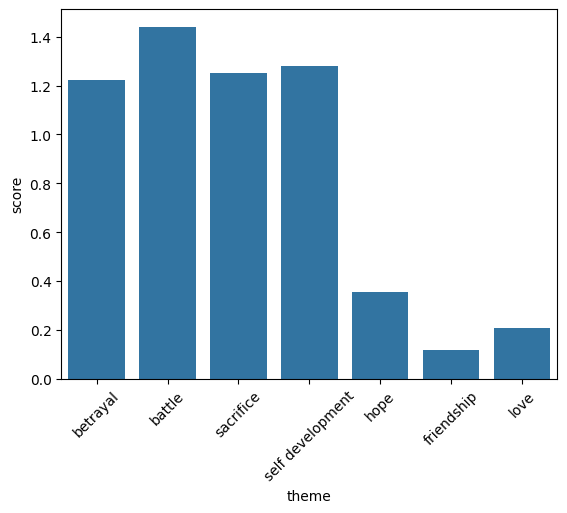

In [73]:
sns.barplot(data=theme_output, x="theme", y="score")
plt.xticks(rotation=45)
plt.show()